<a href="https://colab.research.google.com/github/HasithaHja/Deep-learning-with-TensorFlow/blob/main/01_neural_network_regression_with_tensorflow_video.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Introduction to Regression with Neural Networks in TensorFlow

There are many definitions for a regression problem but in our case, we're going to simplify it: predicting a numerical variable based on some other combination of variables, even shorter... predictiong a number.

🔗 [github for more information](https://github.com/mrdbourke/tensorflow-deep-learning)

In [1]:
## Import tensorflow
import tensorflow as tf
print(tf.__version__)

2.15.0


### Creating data to view and fit

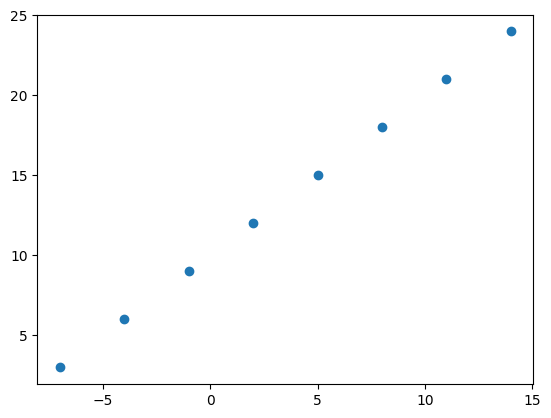

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Create features
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Create label
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# Visualize it
plt.scatter(X, y);

In [3]:
y == X + 10

array([ True,  True,  True,  True,  True,  True,  True,  True])

## Input and output shapes

In [4]:
# Create a demo tensor for our housing price prediction
house_info = tf.constant(["bedroom", "Bathroom", "garage"])
house_price = tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'Bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [5]:
X[0], y[0]

(-7.0, 3.0)

In [6]:
input_shape = X.shape
output_shape = y.shape
input_shape, output_shape

((8,), (8,))

In [7]:
X[0].ndim

0

In [8]:
# Turn our NumPy arrays into tensors with dtype float32
X = tf.cast(tf.constant(X), dtype=tf.float32)
y = tf.cast(tf.constant(y), dtype=tf.float32)
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

## Steps in modeling with TensorFlow

1. **Creating a model** - define the input and output layers, as well as the hidden layers of a deep learning model.
2. **Compiling a model** - defining the loss function (in other words, the function which tells our model how wrong it is) and the optimizer (tells our model how to improve the patterns its learning) and evaluation matrics (what we can use to interpret the performance of our model).
3. **Fitting a model** - letting the model try to find patterns between X & y (features and labels)

In [10]:
X.reshape(1, 1)

AttributeError: EagerTensor object has no attribute 'reshape'. 
        If you are looking for numpy-related methods, please run the following:
        tf.experimental.numpy.experimental_enable_numpy_behavior()
      

In [12]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create the model
model = tf.keras.Sequential([tf.keras.layers.Dense(1)])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae, # mae is short for mean absolute error
              optimizer=tf.keras.optimizers.SGD(), # sgd is short for stochastic gradient descent
              metrics=["mae"])

# 3. Fitting the model
model.fit(X, y, epochs=5, verbose=0)

ValueError: in user code:

    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1401, in train_function  *
        return step_function(self, iterator)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1384, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1373, in run_step  **
        outputs = model.train_step(data)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1150, in train_step
        y_pred = self(x, training=True)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/input_spec.py", line 253, in assert_input_compatibility
        raise ValueError(

    ValueError: Exception encountered when calling layer 'sequential_1' (type Sequential).
    
    Input 0 of layer "dense_1" is incompatible with the layer: expected min_ndim=2, found ndim=1. Full shape received: (None,)
    
    Call arguments received by layer 'sequential_1' (type Sequential):
      • inputs=tf.Tensor(shape=(None,), dtype=float32)
      • training=True
      • mask=None


In [14]:
# change the shape of the input
X = tf.reshape(X, shape=(-1, 1))
X, y, X.ndim, y.ndim
model.fit(X, y, epochs=5)

Epoch 1/5
1/1 [==============================] - ETA: 0s

ValueError: Unexpected result of `train_function` (Empty logs). This could be due to issues in input pipeline that resulted in an empty dataset. Otherwise, please use `Model.compile(..., run_eagerly=True)`, or `tf.config.run_functions_eagerly(True)` for more information of where went wrong, or file a issue/bug to `tf.keras`.

> ✅ The reshaping should done befor the model compiled and trained or we can use `input_size` parameter in `Dense`.


In [15]:
# Create features
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Create label
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# Turn our NumPy arrays into tensors with dtype float32
X = tf.cast(tf.constant(X), dtype=tf.float32)
y = tf.cast(tf.constant(y), dtype=tf.float32)

# change the shape of the input
X = tf.reshape(X, shape=(-1, 1))

# Set the random seed
tf.random.set_seed(42)

# 1. Create the model
model = tf.keras.Sequential([tf.keras.layers.Dense(1)])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae, # mae is short for mean absolute error
              optimizer=tf.keras.optimizers.SGD(), # sgd is short for stochastic gradient descent
              metrics=["mae"])

model.fit(X, y, epochs=5, verbose=0)

In [16]:
# try to make prediction
model.predict([17.0])

1/1 [==============================] - 0s 143ms/step


array([[-14.03049]], dtype=float32)

## Improving the model

We can improve our model, by altering the steps we took to create a model

1. **Creating a model** - here we might add more layers, increase the number of hidden units (all called neurones) within each of the hidden layers, change the activation function of each layer.
2. **Compiling a model** - here we might change the optimization function or perhaps the **learning rate** of the optimization function.
3. **Fitting a model** - here we might fit a model for more **epochs** (leave it training for longer) or on more data (give the model more examples to learn from)

In [17]:
# Rebuild our model
# 1. Create the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# 3. Fit the model
model.fit(X, y, epochs=100, verbose=0)

In [18]:
X, y

(<tf.Tensor: shape=(8, 1), dtype=float32, numpy=
 array([[-7.],
        [-4.],
        [-1.],
        [ 2.],
        [ 5.],
        [ 8.],
        [11.],
        [14.]], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [19]:
# Let's see if our model predictions have improved
model.predict([17.0])

1/1 [==============================] - 0s 106ms/step


array([[29.591557]], dtype=float32)

> ⭕ ⭕ ⭕

In [20]:
# Rebuild our model
# 1. Create the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# 3. Fit the model
model.fit(X, y, epochs=100, verbose=0)

# Let's see if our model predictions have improved
print('----------------------\n', model.predict([17.0]))

1/1 [==============================] - 0s 67ms/step
----------------------
 [[31.512947]]


> ⭕ ⭕ ⭕

In [21]:
# Rebuild our model
# 1. Create the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# 3. Fit the model
model.fit(X, y, epochs=100, verbose=0)

# Let's see if our model predictions have improved
print('----------------------\n', model.predict([17.0]))

1/1 [==============================] - 0s 75ms/step
----------------------
 [[32.387012]]


> ⭕ ⭕ ⭕

In [22]:
# Rebuild our model
# 1. Create the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# 3. Fit the model
model.fit(X, y, epochs=100, verbose=0)

# Let's see if our model predictions have improved
print('----------------------\n', model.predict([17.0]))

1/1 [==============================] - 0s 85ms/step
----------------------
 [[33.40191]]


> ⭕ ⭕ ⭕

In [23]:
# Rebuild our model
# 1. Create the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(lr=0.01),
              metrics=["mae"])

# 3. Fit the model
model.fit(X, y, epochs=100, verbose=0)

# Let's see if our model predictions have improved
print('----------------------\n', model.predict([17.0]))

1/1 [==============================] - 0s 83ms/step
----------------------
 [[31.285294]]


> ❗ The learning rate is a more important parameter of most of the models

## Evaluating a model

In practice, a typical workflowyou'll go through when building nural network is:

```
Build a model -> fit it ->  evaluate it -> tweak a model -> fit it -> evaluate it -> tweak a model -> fit it -> evaluate it...

```

When it comes to evaluation... there are 3 words you should memorize:

> 🔴 "Visualize, visualize, visualize"

It's good idea to visualize:
* The data - what data are we working with? what does it look like?
* The model itself - what does our model look like?
* The training of a model - how does a model performs while it trains?
* The predictions of the model - how do the prediction of a model line up against the ground truth (the original labels)

In [24]:
# make a bigger dataset
X = tf.range(-100, 100, 4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [25]:
# make labels for the dataset
y = X + 10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

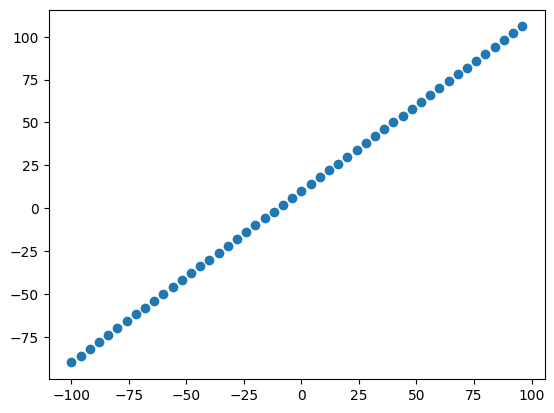

In [26]:
# Visualize the data
plt.scatter(X, y)

### The 3 sets...

* **Training set** - the model learns from this data, which is typically 70-80% of the total data you have available.
* **Validation set** - the model gets tuned on this data, which is typically 10-15% of the data available.
* **Test set** - the model get evaluated on this data to test what it has learned, this set is typically 10-15% of the total data available.

In [27]:
# Check the length of how many smples do we have
len(X)

50

In [28]:
# Split the data into train and test sets
X_train = X[:40] # first 40 are training samples (80% of the data)
y_train = y[:40]

X_test = X[40:]
y_test = y[40:]

### Visualizing the data

Now we got our data into training and testing sets... let's visualize it again

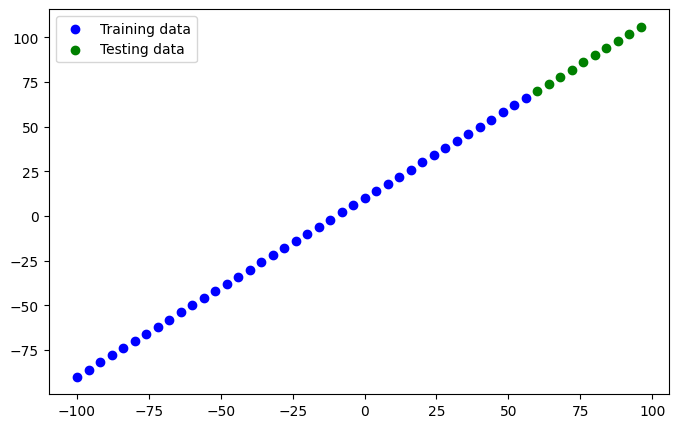

In [29]:
plt.figure(figsize=(8, 5))
# Plot training data in blue
plt.scatter(X_train, y_train, c="b", label="Training data")
# Plot testing data in green
plt.scatter(X_test, y_test, c="g", label="Testing data")
# Show a legend
plt.legend();

In [30]:
# Let's create a nural network for our data

# 1. Building a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile a model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

In [32]:
model.summary()

ValueError: This model has not yet been built. Build the model first by calling `build()` or by calling the model on a batch of data.

In [33]:
# 1. Building a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape=[1], activation="relu", name="layer_1"),
    tf.keras.layers.Dense(1, name="layer_2")

], name="model_1")

model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer_1 (Dense)             (None, 10)                20        
                                                                 
 layer_2 (Dense)             (None, 1)                 11        
                                                                 
Total params: 31 (124.00 Byte)
Trainable params: 31 (124.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


* Total params - total number of parameters in the model.
* Trainable params - these are the parameters (patterns) the model can update as it trains.
* Non-trainable params - these parameters arn't updated during training (this is typically when you bring in already learn patterns or parameters from other models during **transfer learning**).

📖 **Resource:** For more indepth overview of the trainable parameters within a layer, check out MIT's introduction to deep learning video.

⏩ **Exerciese:** Try playing around with the number of hidden units in the dense layer, see how that effects the number of parameters (total and trainable) by calling `model.summary()`.

# Let's fit our model to the training data
model.fit(X_train, y_train, epochs=100, verbose=1)

> 🏮 In a previous blockquote, i did reshape the X parameter to run the model correctly, now i know it could be done using `input_shape` parameter in `tf.keras.layers.Dense`.

 🔗https://colab.research.google.com/drive/19UNmJyJQGQjwSy4vE-1C5S33RkiUbIc9#scrollTo=5JnHm0pY-Ibo&line=1&uniqifier=1

In [34]:
model.fit(X_train, y_train, epochs=20, verbose=0)

In [35]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer_1 (Dense)             (None, 10)                20        
                                                                 
 layer_2 (Dense)             (None, 1)                 11        
                                                                 
Total params: 31 (124.00 Byte)
Trainable params: 31 (124.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


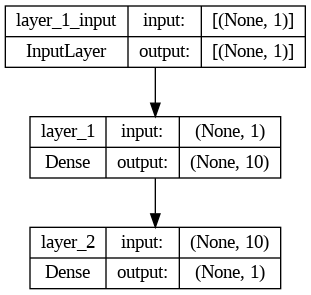

In [36]:
from tensorflow.keras.utils import plot_model

plot_model(model=model, show_shapes=True)

## Visualizing our model's predictions

To visualize predictions, it's a good idea to plot them against the ground truth labels.

Often you'll see this in the form of `y_test` or `y_true` verses `y_pred` (ground truth verses your model's predictions)

In [37]:
# Make some predictions
y_pred = model.predict(X_test)
y_pred

1/1 [==============================] - 0s 59ms/step


array([[ 87.91063 ],
       [ 93.76013 ],
       [ 99.60962 ],
       [105.459114],
       [111.30861 ],
       [117.1581  ],
       [123.0076  ],
       [128.8571  ],
       [134.70657 ],
       [140.55608 ]], dtype=float32)

In [38]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

🔑 **Note:** If you feel like you're going to reuse some kind of functionality in the future, it;s a good idea to turn it into a function

In [39]:
# Let's create a plotting function
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=y_pred):
  """
  Plots training data, test data and compares predictions to ground truth labels

  """
  plt.figure(figsize=(10, 7))
  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", label="Training data")
  # Plot testing data in green
  plt.scatter(test_data, test_labels, c="g", label="Testing data")
  # Plot predictions in red
  plt.scatter(test_data, predictions, c="r", label="predictions")
  # Show the legend
  plt.legend();

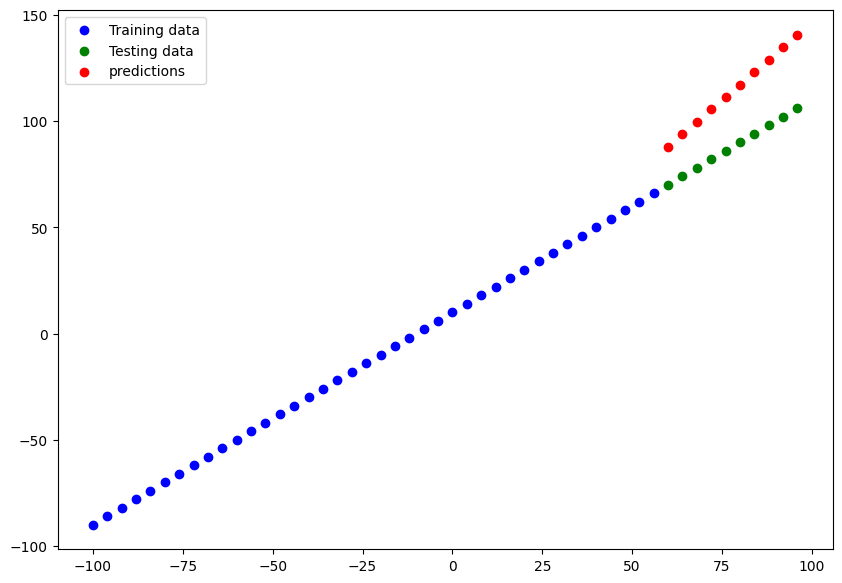

In [40]:
plot_predictions()

## Evaluating our model's predictions using regression evaluation matrics

Depending on the problem you're working on, there will be different evaluation metrics to evaluate you model's performance.

Since we're working on a regression model, two of the main metrics:
* MAE - mean absolute error, "on average, how wrong is each of my model's performance"
* MSE - mean squared error, "square the average errors"

In [41]:
 # Evaluate he model on the test
 model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 171ms/step - loss: 26.2334 - mae: 26.2334


[26.233352661132812, 26.233352661132812]

In [42]:
# Calculate the mean absolute error
tf.keras.losses.mae(y_test, y_pred)

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([10.      , 10.752027, 13.365771, 17.567291, 23.308609, 29.158096,
       35.0076  , 40.8571  , 46.706573, 52.55608 ], dtype=float32)>

In [43]:
y_pred

array([[ 87.91063 ],
       [ 93.76013 ],
       [ 99.60962 ],
       [105.459114],
       [111.30861 ],
       [117.1581  ],
       [123.0076  ],
       [128.8571  ],
       [134.70657 ],
       [140.55608 ]], dtype=float32)

In [44]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [45]:
y_pred_tensor = tf.constant(y_pred)
y_pred_tensor

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[ 87.91063 ],
       [ 93.76013 ],
       [ 99.60962 ],
       [105.459114],
       [111.30861 ],
       [117.1581  ],
       [123.0076  ],
       [128.8571  ],
       [134.70657 ],
       [140.55608 ]], dtype=float32)>

In [46]:
# The shapes are different so,
y_pred_squ = tf.squeeze(y_pred_tensor)
y_pred_squ

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([ 87.91063 ,  93.76013 ,  99.60962 , 105.459114, 111.30861 ,
       117.1581  , 123.0076  , 128.8571  , 134.70657 , 140.55608 ],
      dtype=float32)>

In [47]:
# Calculating mae
tf.keras.losses.mae(y_test, y_pred_squ)

<tf.Tensor: shape=(), dtype=float32, numpy=26.233356>

In [48]:
# Calculating the mean squared error
tf.keras.losses.mse(y_test, y_pred_squ)

<tf.Tensor: shape=(), dtype=float32, numpy=716.40906>

In [49]:
# Make some functions to reuse MAE and MSE
def mae(y_test, y_pred):
  return tf.keras.losses.mae(y_test,
                             tf.constant(tf.squeeze(y_pred)))

def mse(y_test, y_pred):
  return tf.metrics.mean_squared_error(y_test,
                             tf.constant(tf.squeeze(y_pred)))

## Running experiments to evaluate our model

```
Build a model -> fit it -> evaluate it -> tweak it -> fit it -> evaluate it -> tweak it -> fit it ...

```

1. Get more data - get more examples to your model to train on (more opportunities to learn patterns or relationships between features and labels).
2. Make your model larger (using a more complex model) - this might come in the form of more layers or more hidden units in each layer.
3. Train for longer - give your model more of a chance to find patterns in the data.

Let's do 3 modelling experiments:
 1. `model_1` - same as the original model, 1 layer, trained for 100 epochs
 2. `model_2` - 2 layers, trained for 100 epochs
 3. `model_3` - 2 layers, trained for 500 epochs

In [50]:
X_train, y_train, y_test

(<tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
         -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
         -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
          32,   36,   40,   44,   48,   52,   56], dtype=int32)>,
 <tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
        -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
         14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
         66], dtype=int32)>,
 <tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>)

**Build `model_1`**

In [51]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create the model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape=[1])
])

# 2. Compile the model
model_1.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# 3. Fit the model
model_1.fit(X_train, y_train, epochs=100, verbose=0)


1/1 [==============================] - 0s 34ms/step


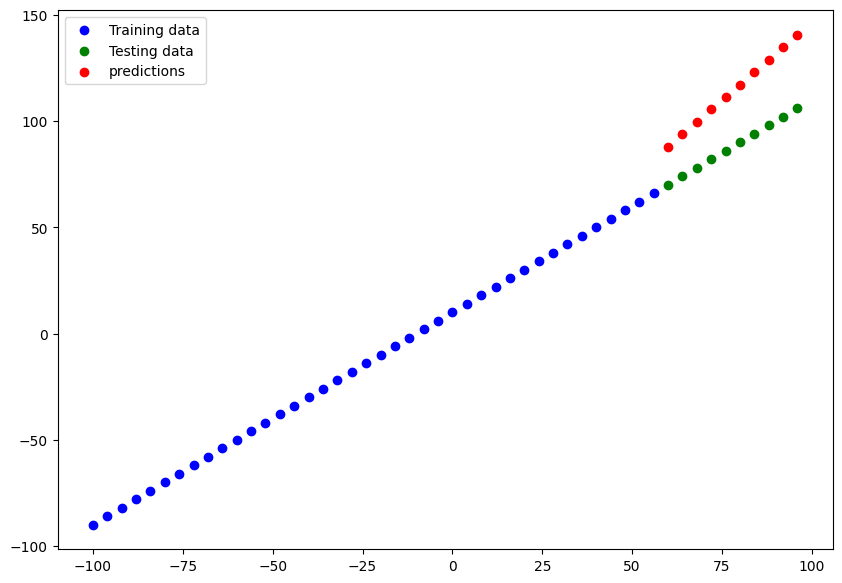

In [52]:
# Make and plot predictions
y_preds_1 = model.predict(X_test)
plot_predictions(predictions=y_preds_1)

In [53]:
# Create model_1 evaluation metrics
mae_1 = mae(y_test, y_preds_1)
mse_1 = mse(y_test, y_preds_1)
mae_1, mse_1

(<tf.Tensor: shape=(), dtype=float32, numpy=26.233356>,
 <tf.Tensor: shape=(), dtype=float32, numpy=716.40906>)

🩸 **Build `model_2`**

* 2 dense layers, trained for 100 epocs

In [54]:
tf.random.set_seed(42)

# Creating the model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape=[1]),
    tf.keras.layers.Dense(1)
])

# Compile the model
model_2.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mse"])

model_2.fit(X_train, y_train, epochs=100, verbose=0)

1/1 [==============================] - 0s 55ms/step


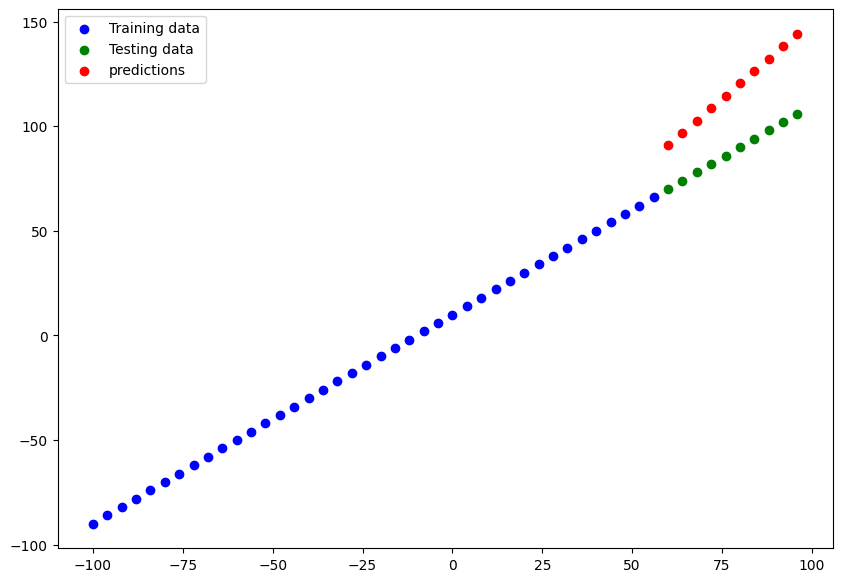

In [55]:
# Make predictions
y_preds_2 = model_2.predict(X_test)
plot_predictions(predictions=y_preds_2)

In [56]:
# Create model_2 evaluation metrics
mae_2 = mae(y_test, y_preds_2)
mse_2 = mse(y_test, y_preds_2)
mae_2, mse_2

(<tf.Tensor: shape=(), dtype=float32, numpy=29.485327>,
 <tf.Tensor: shape=(), dtype=float32, numpy=900.1627>)

🩸 **Build `model_3`**

* 2 dense layers, trained for 500 epochs

In [57]:
tf.random.set_seed(42)

# Creating the model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape=[1]),
    tf.keras.layers.Dense(1)
])

# Compile the model
model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mse"])

model_3.fit(X_train, y_train, epochs=500, verbose=0)

1/1 [==============================] - 0s 99ms/step


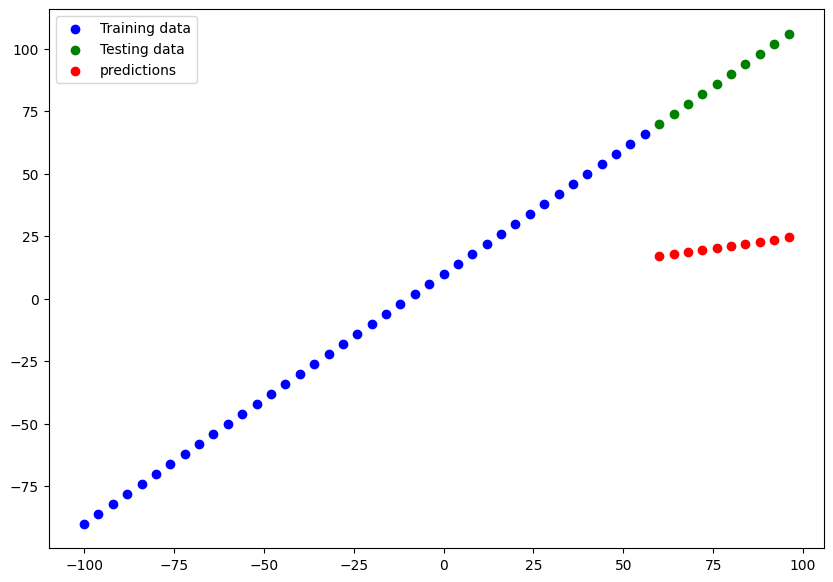

In [58]:
# Make predictions
y_preds_3 = model_3.predict(X_test)
plot_predictions(predictions=y_preds_3)

In [59]:
# Create model_3 evaluation metrics
mae_3 = mae(y_test, y_preds_3)
mse_3 = mse(y_test, y_preds_3)
mae_3, mse_3

(<tf.Tensor: shape=(), dtype=float32, numpy=67.24038>,
 <tf.Tensor: shape=(), dtype=float32, numpy=4603.957>)

🔑 **Note:** you want to start with small experiments (small models) and make sure they work and then increse their sale when necessary.

## Comparing the results of our experiments

we've run few experiments, let's compare the results

In [60]:
# Let's compare our model's results using a pandas DataFrame
import pandas as pd

model_results = [["model_1", mae_1.numpy(), mse_1.numpy()],
                 ["model_2", mae_2.numpy(), mse_2.numpy()],
                 ["model_3", mae_3.numpy(), mse_3.numpy()]]

all_results = pd.DataFrame(model_results, columns=["model", "mae", "mse"])
all_results

,model,mae,mse
0,model_1,26.233356,716.409058
1,model_2,29.485327,900.162720
2,model_3,67.240379,4603.957031


Looks like `model_2` performed the best...

In [61]:
model_2.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_19 (Dense)            (None, 10)                20        
                                                                 
 dense_20 (Dense)            (None, 1)                 11        
                                                                 
Total params: 31 (124.00 Byte)
Trainable params: 31 (124.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


> 🔑 **Note:** One of your main goals should be to minimize the time between your experiments. The more experiments you do, the more things you'll figure out which don't work and in turn, get closer to figuring out what does work. Remembe the machine learning practitionars motto: "Experiment, experiment, experiment".

## Tracking your experiments

One really good habit in machine learning modelling is to track the results of your experiments.

And when doing so, it can be tedious if you're running lots of experiments.

Luckily, there are tools to help us!

📖 **Resource:** As you build more models, you'll want to look into using:

* [TensorBoard](https://www.tensorflow.org/tensorboard) - a component of the TensorFlow library to help track modelling experiments.
* [Weights & Biases](https://wandb.ai/site) - a tool for tracking all kinds of machine learning experiments (plugs straight into TensorBoard).

## Saving our models

Saving our models allows us to use them outside of google colab such as in a web application or a mobile app.

There are two main formats we can [save our models](https://www.tensorflow.org/tutorials/keras/save_and_load) too:

1. the [SavedModel](https://www.tensorflow.org/guide/saved_model) format
2. the HDF5 format

In [62]:
# Saving model using the SaveModel formt
model_2.save("best_model_SaveModel_format")

In [63]:
# Saving model using HDF5 format
model_2.save("best_model_HDF5_format.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


## Loading a saved model

In [64]:
# Load in the SavedModel format model

load_SavedModel_format = tf.keras.models.load_model("best_model_SaveModel_format")
load_SavedModel_format.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_19 (Dense)            (None, 10)                20        
                                                                 
 dense_20 (Dense)            (None, 1)                 11        
                                                                 
Total params: 31 (124.00 Byte)
Trainable params: 31 (124.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [65]:
# Compare model_2 predictions with SaveModel format model predictions
model_2_preds = model_2.predict(X_test)
loaded_SaveModel_format_preds = load_SavedModel_format.predict(X_test)
model_2_preds == loaded_SaveModel_format_preds

1/1 [==============================] - 0s 54ms/step


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

In [66]:
# Load in a model using .h5 format
loaded_h5_model = tf.keras.models.load_model("best_model_HDF5_format.h5")
loaded_h5_model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_19 (Dense)            (None, 10)                20        
                                                                 
 dense_20 (Dense)            (None, 1)                 11        
                                                                 
Total params: 31 (124.00 Byte)
Trainable params: 31 (124.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [67]:
loaded_h5_model_preds = loaded_h5_model.predict(X_test)
model_2_preds == loaded_h5_model_preds

1/1 [==============================] - 0s 72ms/step


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

## Download a model (or any other file) from Google Colab

If you want to download your files from Google Colab:

1. You can go to the "Files" tab and right click the file you're after and click "Download",
2. Use code
3. Save it to Google Drive by connecting Google Drive and copying it there

In [68]:
# Download file from Google Colab
from google.colab import files
files.download("/content/best_model_HDF5_format.h5")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [69]:
# Save a file from Google Colab to Google Drive (requires mounting Google Drive)
!cp /content/best_model_HDF5_format.h5 /content/drive/MyDrive/TensorFlow_corse

In [70]:
!ls /content/drive/MyDrive/TensorFlow_course

/content/drive/MyDrive/TensorFlow_course


## A larger example

In [71]:
# Import required libraries
import tensorflow as tf
import pandas as pd
import numpy as np


In [72]:
# Read in the insuarence dataset
insuarence = pd.read_csv("https://gist.githubusercontent.com/meperezcuello/82a9f1c1c473d6585e750ad2e3c05a41/raw/d42d226d0dd64e7f5395a0eec1b9190a10edbc03/Medical_Cost.csv")
insuarence

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [73]:
# Let's try one-hot encode our dataframe
insuarence_one_hot = pd.get_dummies(insuarence, dtype="int64") # dtype should set to int64 otherwise it will be bool data type and model will not run properly
insuarence_one_hot.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [74]:
# Create X & y values
X = insuarence_one_hot.drop("charges", axis=1)
y = insuarence_one_hot["charges"]

In [75]:
# View X
X.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0


In [76]:
# View y
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [77]:
# Creating training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
len(X), len(X_train), len(X_test)

(1338, 1070, 268)

In [78]:
X_train.dtypes

age                   int64
bmi                 float64
children              int64
sex_female            int64
sex_male              int64
smoker_no             int64
smoker_yes            int64
region_northeast      int64
region_northwest      int64
region_southeast      int64
region_southwest      int64
dtype: object

In [79]:
# Build a neural network
tf.random.set_seed(42)

# 1. Create a model
insuarance_model = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
insuarance_model.compile(loss=tf.keras.losses.mae,
                         optimizer=tf.keras.optimizers.SGD(),
                         metrics=["mae"])

# 3. Fit the model
insuarance_model.fit(X_train, y_train, epochs=100)

Epoch 1/100
34/34 [==============================] - 2s 4ms/step - loss: 8654.4248 - mae: 8654.4248
Epoch 2/100
34/34 [==============================] - 0s 3ms/step - loss: 7817.0688 - mae: 7817.0688
Epoch 3/100
34/34 [==============================] - 0s 4ms/step - loss: 7501.8359 - mae: 7501.8359
Epoch 4/100
34/34 [==============================] - 0s 4ms/step - loss: 7700.1924 - mae: 7700.1924
Epoch 5/100
34/34 [==============================] - 0s 4ms/step - loss: 7677.8281 - mae: 7677.8281
Epoch 6/100
34/34 [==============================] - 0s 7ms/step - loss: 7605.8940 - mae: 7605.8940
Epoch 7/100
34/34 [==============================] - 0s 5ms/step - loss: 7549.5957 - mae: 7549.5957
Epoch 8/100
34/34 [==============================] - 0s 3ms/step - loss: 7726.9541 - mae: 7726.9541
Epoch 9/100
34/34 [==============================] - 0s 4ms/step - loss: 7535.9370 - mae: 7535.9370
Epoch 10/100
34/34 [==============================] - 0s 4ms/step - loss: 7769.4419 - mae: 7769.4419

In [80]:
# Check the results of the insuarance model on test data
insuarance_model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 4ms/step - loss: 7356.0469 - mae: 7356.0469


[7356.046875, 7356.046875]

Right now it looks like our model isn't performing well... let's try and improve it!

To (try) improve our model, we'll run 2 experiments:

1. Add an extra layer with more hidden units and use the Adam optimizer
2. Train for longer

🔥 **Experiment model**

In [81]:
# Build a neural network
tf.random.set_seed(42)

# 1. Create a model
insuarance_model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
insuarance_model_2.compile(loss=tf.keras.losses.mae,
                         optimizer=tf.keras.optimizers.Adam(),
                         metrics=["mae"])

# 3. Fit the model
insuarance_model_2.fit(X_train, y_train, epochs=100)

Epoch 1/100
34/34 [==============================] - 2s 5ms/step - loss: 13271.8652 - mae: 13271.8652
Epoch 2/100
34/34 [==============================] - 0s 4ms/step - loss: 13091.7607 - mae: 13091.7607
Epoch 3/100
34/34 [==============================] - 0s 5ms/step - loss: 12724.3027 - mae: 12724.3027
Epoch 4/100
34/34 [==============================] - 0s 6ms/step - loss: 12011.5547 - mae: 12011.5547
Epoch 5/100
34/34 [==============================] - 0s 7ms/step - loss: 10836.0840 - mae: 10836.0840
Epoch 6/100
34/34 [==============================] - 0s 7ms/step - loss: 9375.5010 - mae: 9375.5010
Epoch 7/100
34/34 [==============================] - 0s 5ms/step - loss: 8089.9541 - mae: 8089.9541
Epoch 8/100
34/34 [==============================] - 0s 6ms/step - loss: 7526.9824 - mae: 7526.9824
Epoch 9/100
34/34 [==============================] - 0s 8ms/step - loss: 7441.4629 - mae: 7441.4629
Epoch 10/100
34/34 [==============================] - 0s 8ms/step - loss: 7421.8325 - mae:

In [82]:
# Eavaluate the larger model
insuarance_model_2.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 4862.4438 - mae: 4862.4438


[4862.44384765625, 4862.44384765625]

In [83]:
insuarance_model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 3ms/step - loss: 7356.0469 - mae: 7356.0469


[7356.046875, 7356.046875]

In [84]:
# Set random seed
tf.random.set_seed(42)

# Create the model
insuarance_model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# Compile the model
insuarance_model_3.compile(loss=tf.keras.losses.mae,
                           optimizer=tf.keras.optimizers.Adam(),
                           metrics=["mae"])

# Fit the model for 200 epochs
history = insuarance_model_3.fit(X_train, y_train, epochs=500, verbose=0)

In [85]:
# Evaluate the model
insuarance_model_3.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3169.2375 - mae: 3169.2375


[3169.237548828125, 3169.237548828125]

Text(0.5, 0, 'epochs')

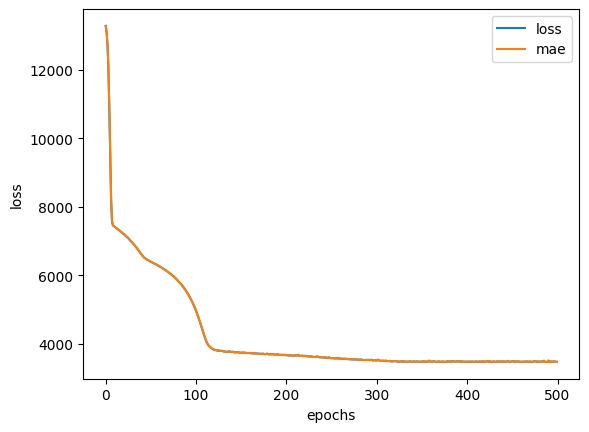

In [86]:
# Plot history (also known as a loss curve or a training curve)
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

> ❓ **Question:** How long should you train for?

It depends on the problem we're working on. As a solutionfor this, we can use TensorFlow early [stopping callback](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/EarlyStopping). Which is a TensorFlow component you can add to your modelto stop training once it stops improving a certain metric.

## Preprocessing data (normalization and standardization)

In terms of scaling values, neural networks tend to prefer normalization.

If you're note sure which to use, you could try both and see which performs better.

[click here](https://www.simplilearn.com/normalization-vs-standardization-article#:~:text=When%20your%20data%20have%20different,of%20your%20data%20is%20Gaussian.) for more information.

In [87]:
X

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,0,1,1,0,0,1,0,0
1334,18,31.920,0,1,0,1,0,1,0,0,0
1335,18,36.850,0,1,0,1,0,0,0,1,0
1336,21,25.800,0,1,0,1,0,0,0,0,1


<Axes: ylabel='Frequency'>

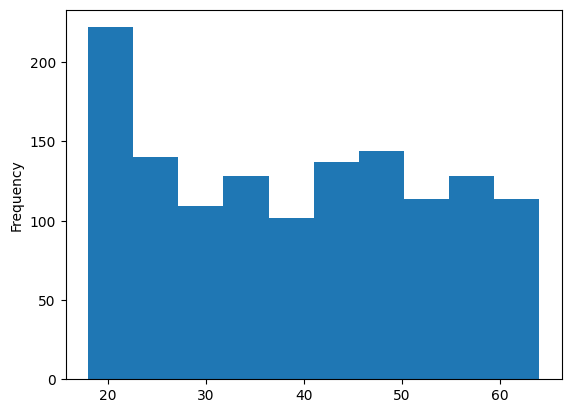

In [88]:
X["age"].plot(kind="hist")

<Axes: ylabel='Frequency'>

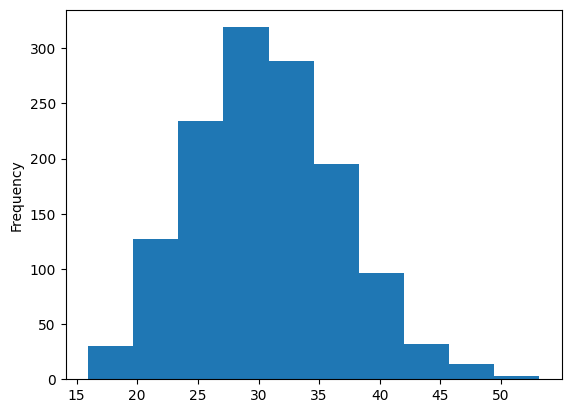

In [89]:
X["bmi"].plot(kind="hist")

In [90]:
X["children"].value_counts()

children
0    574
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64

### Adding the dataset again

In [91]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

insuarance = pd.read_csv("https://gist.githubusercontent.com/meperezcuello/82a9f1c1c473d6585e750ad2e3c05a41/raw/d42d226d0dd64e7f5395a0eec1b9190a10edbc03/Medical_Cost.csv")
insuarance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [98]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

# Create a column transformer
ct = make_column_transformer(
    (MinMaxScaler(), ["age", "bmi", "children"]), # turn all values in the columns between 0 and 1
    (OneHotEncoder(handle_unknown="ignore"), ["sex", "smoker", "region"])
)

# Creating X & y
X = insuarance.drop("charges", axis=1)
y = insuarance["charges"]

# Build train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the column transformer to our training model
ct.fit(X_train)

# Transform training and test data with normalization (MinMaxScalar) and OneHotEncoder
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

In [100]:
# what our data looks like now
X_train.loc[0]

age                19
sex            female
bmi              27.9
children            0
smoker            yes
region      southwest
Name: 0, dtype: object

In [101]:
X_train_normal[0]

array([0.60869565, 0.10734463, 0.4       , 1.        , 0.        ,
       1.        , 0.        , 0.        , 1.        , 0.        ,
       0.        ])

In [103]:
X_train.shape, X_train_normal.shape

((1070, 6), (1070, 11))

### Building a Neural Network Model for our normalized data

In [104]:
# Set random seed
tf.random.set_seed(42)

# Creating the model
insuarance_normal = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# Compile the model
insuarance_normal.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=["mae"])

# Fit the model
insuarance_normal.fit(X_train_normal, y_train, epochs=500, verbose=0)

In [106]:
# Evaluate the model
insuarance_normal.evaluate(X_test_normal, y_test)

9/9 [==============================] - 0s 4ms/step - loss: 3161.3120 - mae: 3161.3120


[3161.31201171875, 3161.31201171875]

## git

[click here](https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/README.md#-01-neural-network-regression-with-tensorflow-exercises)